In [19]:
import pandas as pd
import numpy as np

Gap_list = np.array ([0, 0, 0.8, 1.2, 0.2, -0.2])
Gap_list_df = pd.DataFrame (Gap_list).sort_values ( by = 0, ascending = False)
Gap_list_df = Gap_list_df [ Gap_list_df[0] != 0]

Gap_list_df

,0
3,1.2
2,0.8
4,0.2
5,-0.2


1.02


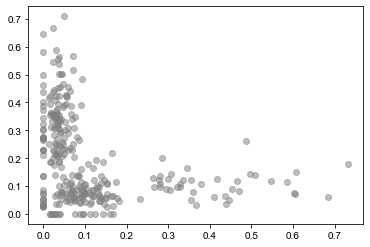

In [85]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import random

#plt.scatter ( x = np_vaf[:, 0], y = np_vaf[:,1], alpha = 0.5)

print ( random.randint(80,120) / 100 )

rr = 7
rrr = [100, 120, 150, 150, 150, 180, 210]

model_np_vaf = np.zeros ( (kwargs["NUM_MUTATION"] * rr , kwargs["NUM_BLOCK"]),  dtype = "float")

for k in range (kwargs["NUM_MUTATION"]):
    for i in range (kwargs["NUM_BLOCK"]):
        for r_index in range (rr):
            while True:
                r =  random.randint(70, rrr[r_index]) / 100
                model_np_vaf [kwargs["NUM_MUTATION"] * r_index +  k][i] = np_vaf[k][i] * r
                if np_vaf[k][i] * r <= 1:          # 곱하고 나누고 늘려줘도 1 이하인 것들만 통과시켜준다
                    break

model_sel_np_vaf = model_np_vaf [ random.sample( range(len(model_np_vaf)), len(np_vaf)) , : ]
plt.scatter ( x = model_sel_np_vaf[:, 0], y = model_sel_np_vaf[:,1], color = "gray", alpha = 0.5)

500


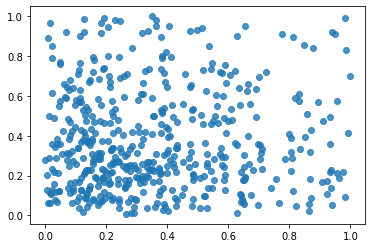

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

t = np.random.poisson ([5, 100])
#u = np.random.dirichlet(alpha[, size])
NUM_MUTATION, NUM_BLOCK = 500, 2
a = np.random.f (3, 10, (NUM_MUTATION * 5, NUM_BLOCK))

# x_max, y_max = np.max (a[:,0]), np.max (a[:,1])
# a = a[ a[:,0] < x_max / 3]
# a = a[ a[:,1] < y_max / 3]

f_max = np.max (a)
a_list = []
for i in range ( len(a) ):
    if np.all ( a [ i ,  : ] < ( f_max / 10 ) ) == True:
        a_list.append(i) 

a = a [np.array (random.sample (a_list, NUM_MUTATION))]
f_max = np.max(a)
a = a / f_max

print ( len(a))


plt.scatter (x = a[:,0], y = a[:,1], alpha = 0.8)

[4.96653575e-01 4.95007512e-01 4.92563897e-01 4.88950931e-01
 4.83640841e-01 4.75904527e-01 4.64776132e-01 4.49058287e-01
 4.27421955e-01 3.98669710e-01 3.62199338e-01 3.18576113e-01
 2.69915693e-01 2.19687684e-01 1.71826315e-01 1.29572213e-01
 9.47101348e-02 6.75182115e-02 4.72236186e-02 3.25697698e-02
 2.22397695e-02 1.50803851e-02 1.01766436e-02 6.84496046e-03
 4.59379178e-03 3.07836534e-03 2.06077695e-03 1.37863065e-03
 9.21866386e-04 6.16249015e-04 4.11866377e-04 2.75231093e-04
 1.83907418e-04 1.22878151e-04 8.20979834e-05 5.48502427e-05
 3.66451718e-05 2.44821594e-05 1.63560780e-05 1.09271344e-05
 7.30015073e-06 4.87704009e-06 3.25821790e-06 2.17672447e-06
 1.45420784e-06 9.71514515e-07 6.49040754e-07 4.33605266e-07
 2.89679036e-07 1.93526100e-07 1.29289124e-07 8.63742770e-08
 5.77041229e-08 3.85504325e-08 2.57544133e-08 1.72057679e-08
 1.14946687e-08 7.67925090e-09 5.13028214e-09 3.42739104e-09
 2.28973929e-09 1.52970769e-09 1.02195274e-09 6.82736645e-10
 4.56116367e-10 3.047179

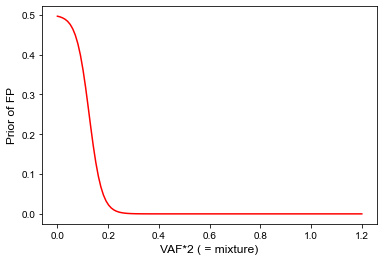

In [90]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from scipy.special import expit

x = np.linspace(0, 1.2, 120)

def fp_prior(x):
    return (1 - expit( 40*x - 5)) * 0.5
    return np.exp(x)
    return 1 / (1 + np.exp(-x))

y = fp_prior (x)

matplotlib.rcParams["font.family"] = 'arial'
plt.xlabel("VAF*2 ( = mixture)", fontdict = {"fontsize" : 12})
plt.ylabel("Prior of FP", fontdict = {"fontsize" : 12})
plt.plot (x,y, color = "red")


print (y)


In [3]:
import filetype, datapreparationold, datapreparation220712, comb, extract, scoring, boundaryclone, graph, phylogeny, scoring, result, isparent, fppick, os
import pyclonesim, pyclonevisim, sciclonesim, datetime, time, subprocess
import EMhard, EMsoft, Estep, Mstep, Outlier, Bunch
import visualizationsingle, visualizationpair, visualizationsinglesoft, visualizationpairsoft, miscellaneous
import numpy as np
import pandas as pd
import scipy
from kneed import KneeLocator
pd.options.mode.chained_assignment = None

INPUT_TSV="/data/project/Alzheimer/EM_cluster/EM_input/MRS_2_sample/M1-5_M1-6_input.txt"     # /data/project/Alzheimer/EM_cluster/EM_input/summary/MRS_2_sample.txt
INPUT_FILETYPE, NUM_BLOCK = filetype.main (INPUT_TSV)
kwargs = {"INPUT_TSV" : INPUT_TSV,  "NUM_BLOCK_INPUT": NUM_BLOCK, "NUM_BLOCK": NUM_BLOCK, "NUM_CLONE_TRIAL_START" : 2, "NUM_CLONE_TRIAL_END" : 6, "NUM_CLONE_FORCE" : 4, 
                "RANDOM_PICK":300, "AXIS_RATIO":0.1, "PARENT_RATIO": 0, "NUM_PARENT" : 0, "FP_RATIO":0.1, "FP_2D" : "False", "TRIAL_NO" : 10, "DEPTH_CUTOFF" : 100, "VERBOSE" : 1, "ELBOW_S" : 3 , "GAUSSIAN_SD" : 1, "MIN_CLUSTER_SIZE" : 2, "OUTLIER_STANDARD" : "looser", "RANDOM_SEED" : 1, "KMEANS_CLUSTERNO" : 15}
NUM_MUTATION = kwargs["RANDOM_PICK"]
kwargs["NUM_MUTATION"] = NUM_MUTATION
SAMPLENAME = INPUT_TSV.split("/")[-1].split(".")[0]     # 'M1-5_M1-8_input'
kwargs["NPVAF_DIR"] = "/data/project/Alzheimer/YSscript/EM_MRS/data/npvaf/" + SAMPLENAME
kwargs["MYEM_DIR"] = "/data/project/Alzheimer/YSscript/EM_MRS/data/MyEM/" + SAMPLENAME
kwargs["SCICLONE_DIR"] = "/data/project/Alzheimer/YSscript/EM_MRS/data/sciclone/" + SAMPLENAME 
kwargs["PYCLONE_DIR"] = "/data/project/Alzheimer/YSscript/EM_MRS/data/pyclone/" + SAMPLENAME 
kwargs["PYCLONEVI_DIR"] = "/data/project/Alzheimer/YSscript/EM_MRS/data/pyclone-vi/" + SAMPLENAME 
kwargs["COMBINED_OUTPUT_DIR"] = "/data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/" + SAMPLENAME 

os.system ("mkdir -p " +  kwargs["NPVAF_DIR"])
os.system ("mkdir -p " +  kwargs["MYEM_DIR"])
os.system ("mkdir -p " + kwargs["SCICLONE_DIR"] )
os.system ("mkdir -p " + kwargs["PYCLONE_DIR"] )
os.system ("mkdir -p " + kwargs["PYCLONEVI_DIR"] )

inputdf, df, np_vaf, membership_answer, mixture_answer,  mutation_id, samplename_dict_input  = datapreparation220712.main(**kwargs)

FP	S0	S0,V1	S0,V2	V1	V1,V2	V2	
93	526	16	17	1342	7	2533	
FP RATIO : {}	PARENT RATIO : {}	
조정 후  FP 개수 : 30	PARENT 개수 : 0	CHILD_SPACE 개수 : 240	CHILD_AXIS 개수 : 30


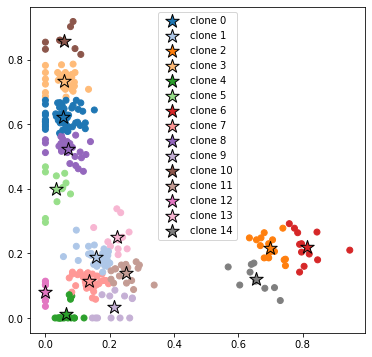

In [5]:
def main(df, **kwargs):
    NUM_BLOCK, kwargs["NUM_BLOCK"]= len(df[0]), len(df[0])
    NUM_MUTATION, kwargs["NUM_MUTATION"]  = kwargs["RANDOM_PICK"], kwargs["RANDOM_PICK"]
    kwargs["STEP_NO"] = 30


    np_vaf = miscellaneous.np_vaf_extract(df)
    mixture_kmeans = miscellaneous.initial_kmeans (np_vaf, kwargs["KMEANS_CLUSTERNO"])
    
    cluster = Bunch.Bunch2(**kwargs)

main (df, **kwargs)